In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
data = pd.read_csv("train.csv")
data.sample(10)

,Unnamed: 0,category,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,date_of_registration
231,3032,information_source,288806.0,0.0,0,12121,15372,2932,2.596021,-0.002371,2024-01-01 00:50:01.048301384
3862,5507,information_source,846248.0,61269.0,0,19646,4998,1126,5.657872,0.015814,2024-05-09 06:50:46.622241252
7893,1111,news,253809.0,17454.0,0,26073,0,886,13.071421,0.108677,2024-02-14 05:45:24.251999324
6932,69,news,4306085.0,267978.0,0,528348,620792,131561,0.270032,-0.344122,2023-06-23 20:57:15.280975736
4574,5164,ecom,3049576.0,383053.0,3049576,32255,66532,14133,-1.000000,0.837530,2023-01-27 23:28:52.261409544
3478,1803,information_source,214348.0,0.0,0,697,0,1068,17.021906,-0.056733,2024-09-08 04:49:48.857319195
171,960,information_source,2049518.0,74998.0,0,0,0,0,1.834283,0.179649,2021-10-27 11:09:10.430705472
4823,9886,information_source,109444.0,0.0,0,9588,0,1044,8.057302,0.089244,2023-08-25 02:34:34.796927988
5876,663,news,328674.0,13430.0,0,8553,0,0,6.781073,0.227128,2021-08-23 18:57:59.808834512
1352,2264,information_source,1856954.0,0.0,0,99380,77732,NaN,1.727942,-0.051687,2024-05-25 15:19:46.453237914


In [138]:
data.dtypes, data.shape

(Unnamed: 0                 int64
 category                  object
 clicks                   float64
 likes                    float64
 buys                       int64
 4xx_errors                 int64
 5xx_errors                 int64
 complaints_count          object
 average_dwelltime        float64
 source_attractiveness    float64
 date_of_registration      object
 dtype: object,
 (8000, 11))

Можем наблюдять, что столбец "date_of_registration" не преобразован в число, а является типом object.

In [141]:
data["date_of_registration"] = pd.to_datetime(data["date_of_registration"])
data["date_of_registration"] = (pd.Timestamp("2024-10-15")-data["date_of_registration"])/pd.Timedelta(days=365)
data.head(5)

,Unnamed: 0,category,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,date_of_registration
0,6622,ecom,6488536.0,NaN,0,82221,0,0,18.450527,0.461750,4.485836
1,2047,information_source,874840.0,21100.0,0,12872,0,0,10.721619,-0.022317,0.238375
2,1118,information_source,571210.0,94707.0,0,0,7420,0,1.922243,0.046396,0.255639
3,4992,news,89534.0,924.0,0,834,0,0,2.149243,-0.093360,0.093438
4,9970,information_source,1043953.0,289288.0,0,58375,20260,3948,3.764965,0.027303,0.387772


<Axes: >

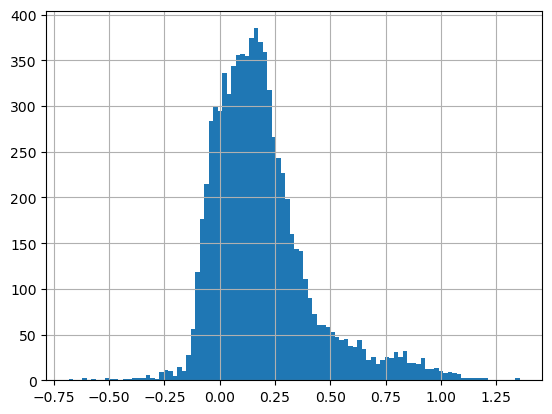

In [143]:
data["source_attractiveness"].hist(bins = 100)

In [145]:
data["source_attractiveness"].mean(),data["source_attractiveness"].median(),data["source_attractiveness"].describe()

(0.19199688460706613,
 0.1542557099964202,
 count    8000.000000
 mean        0.191997
 std         0.227873
 min        -0.681718
 25%         0.038220
 50%         0.154256
 75%         0.282510
 max         1.355736
 Name: source_attractiveness, dtype: float64)

# Анализ графика
- `Распределение` похоже на нормальное, где большая часть значений сформированы вокруг среднего.
-  `Выбросы` видны на графике, которые встречаются реже и находятся далеко от центра.
-  `Среднее значение` составляет 0.19199688460706613.
-  `Медиана` составляет 0.1542557099964202.
-  `Основная часть значений` сконцентрирована в диапазоне от -0,25 до 0,50.

# Перейдем к обработке данных и анализу данных

In [149]:
data["complaints_count"] = pd.to_numeric(data["complaints_count"].replace("-", np.nan))
data["complaints_count"].value_counts()

Y = data["source_attractiveness"]
X = data.drop(columns = 'source_attractiveness')

In [151]:
data.sample(20)

,Unnamed: 0,category,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,date_of_registration
5357,9461,ecom,3396819.0,0.0,3396819,173420,66222,15132.0,10.144441,0.837487,2.143202
4149,7957,information_source,308783.0,0.0,0,6185,2258,2350.0,1.518154,-0.045869,0.201467
1070,4705,ecom,9833694.0,3329386.0,191712,258221,281816,58015.0,1.283953,0.206873,2.354965
7942,4210,information_source,65737.0,28136.0,0,1141,0,289.0,3.636769,0.203119,0.981710
2537,3668,news,395137.0,2834.0,0,7964,0,0.0,2.894140,-0.027945,0.340011
1906,5230,news,2076376.0,177945.0,0,167721,0,1470.0,6.142656,0.099094,1.791412
535,6658,news,932894.0,50771.0,0,65301,0,0.0,7.524411,0.108208,0.931670
1553,6770,ecom,569652.0,207853.0,56779,7958,2981,1198.0,15.928338,0.155180,0.207992
7328,3122,social,311492.0,13543.0,0,20212,4331,420.0,63.604016,0.175667,2.773375
5534,1181,ecom,22723640.0,19723153.0,8862019,202314,17886,5607.0,1.218986,0.576787,1.200320


In [153]:
numeric_data = X.select_dtypes([np.number])
numeric_features = numeric_data.columns

numeric_features

Index(['Unnamed: 0', 'clicks', 'likes', 'buys', '4xx_errors', '5xx_errors',
       'complaints_count', 'average_dwelltime', 'date_of_registration'],
      dtype='object')

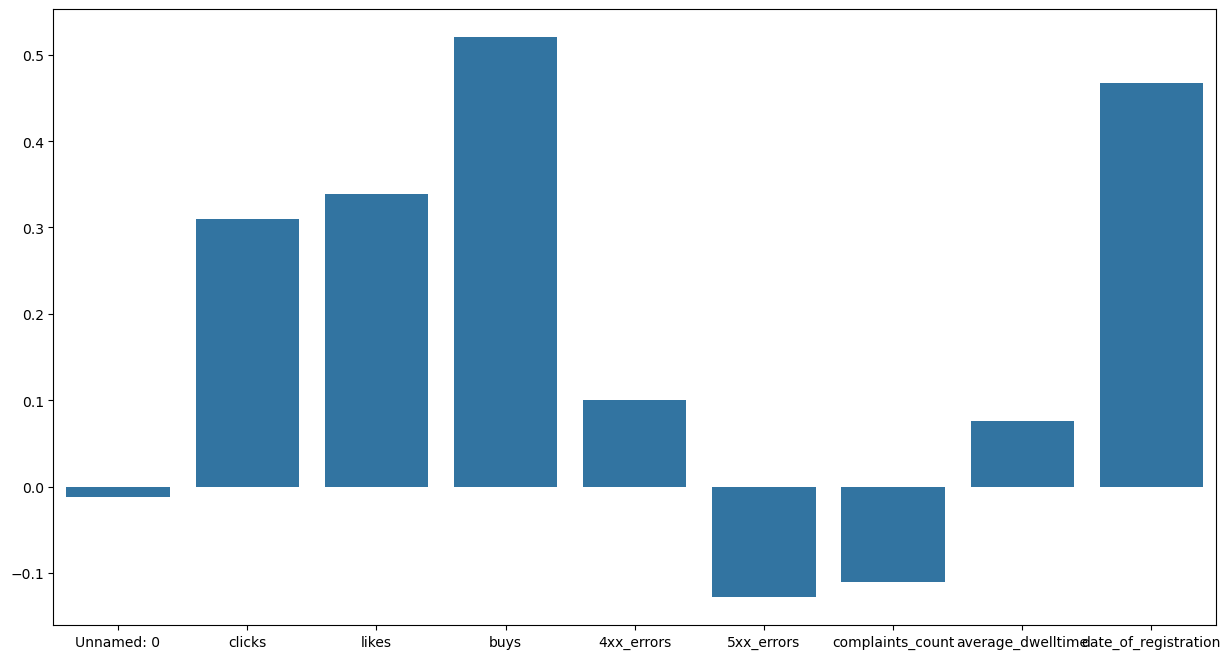

In [155]:
correl = X[numeric_features].corrwith(Y)

plot = sns.barplot(correl)
plot.figure.set_size_inches(15,8)

# Проанализируем диаграмму корреляции с target переменной

- `Unnamed: 0` корреляция практически равна нулю, что означает, что этот столбец не влияет на целевую переменную(его можно удалить).
- `Clicks and likes` имеют схожие корреляции около 0.3, что говорит о том, что увеличение числа кликов и лайков положительно связано с целевой переменной.
- `5xx_errors` здесь наблюдается отрицательная корреляция, что означает, что увеличение числа ошибок сервера связано с уменьшением целевой переменной. Вероятно, это негативно влияет на взаимодействие с пользователями.
- `average_dwelltime` имеет положительную, но относительно низкую корреляцию с целевой переменной. Это указывает на слабую связь между временем пребывания и целевой переменной.
- `date_of_registration` Демонстрирует довольно сильную положительную корреляцию, более 0.5. Это может означать, что дата регистрации пользователей оказывает значительное влияние на целевую переменную (возможно, чем раньше была регистрация, тем больше вероятность активности пользователя).
- `Buys` имеет самую высокую корреляцию (более 0.5), что указывает на сильную связь с целевой переменной. Это может говорить о том, что покупка является важным индикатором для прогнозируемого значения.
- `4xx_errors` Признак имеет умеренную положительную корреляцию, что может указывать на то, что ошибки клиента (например, 404) также могут иметь некоторое влияние на целевую переменную.
- `complaints_count` наблюдается отрицательная корреляция, значит увеличение кол-во жалоб связано с уменьшением целевой переменной.

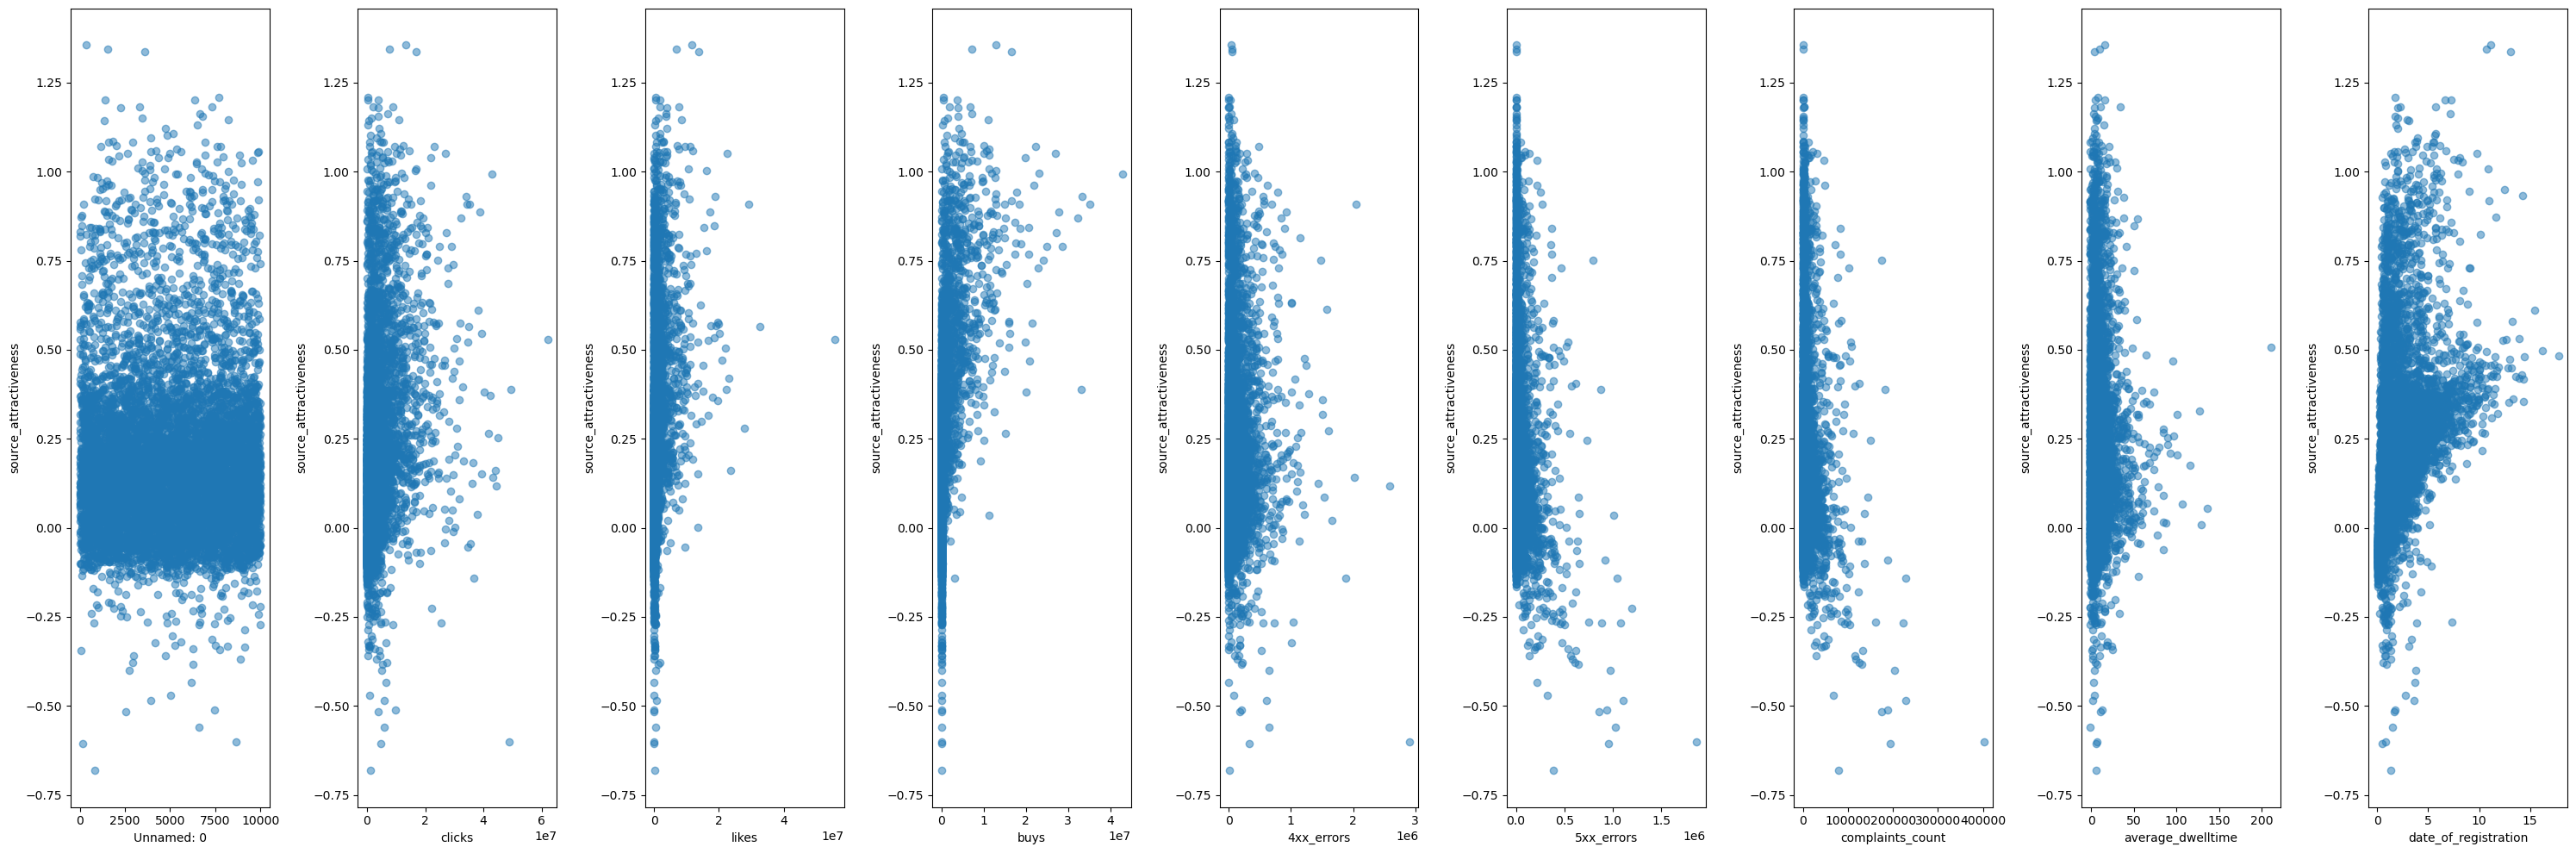

In [158]:
fig,axs = plt.subplots(figsize=(30,10), ncols=9)
for i, feature in enumerate(numeric_features):
    axs[i].scatter(X[feature], Y, alpha=0.5)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("source_attractiveness")
plt.tight_layout()

In [159]:
X["Unnamed: 0"].describe()

count    8000.000000
mean     5006.138875
std      2893.886162
min         0.000000
25%      2493.250000
50%      5035.000000
75%      7521.250000
max      9999.000000
Name: Unnamed: 0, dtype: float64

Наши предположения подтвердились, признак "Unnamed: 0" не имеет какой либо корреляции с таргетом.

Теперь поработаем с nan значениями. Для начало попробуем их посчитать.

In [163]:
nan_counter_columns = data.isna().any(axis=1)
nan_counter = nan_counter_columns.sum()

nan_counter, nan_counter_columns, 1450/8000

(1450,
 0        True
 1       False
 2       False
 3       False
 4       False
         ...  
 7995    False
 7996    False
 7997    False
 7998    False
 7999     True
 Length: 8000, dtype: bool,
 0.18125)

Можно заметить, что строк с nan значениями 1450 это 18% всего дата-сета, довольно много, но вначале попробуем их удалить

In [166]:
data_clean = data.dropna()

In [168]:
nan_counter = data_clean.isna().sum()
print(nan_counter)
Y = data_clean["source_attractiveness"]
X = data_clean.drop(columns = "source_attractiveness")

Unnamed: 0               0
category                 0
clicks                   0
likes                    0
buys                     0
4xx_errors               0
5xx_errors               0
complaints_count         0
average_dwelltime        0
source_attractiveness    0
date_of_registration     0
dtype: int64


# Преступим к обучению тестовой модели.

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

X_train, x_test, Y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=10)

model = Ridge()
model.fit(X_train[numeric_features],Y_train)
y_pred = model.predict(x_test[numeric_features])
y_pred_train = model.predict(X_train[numeric_features])

print(f"TEST MSE:{mean_squared_error(y_pred, y_test)}")
print(f"TRAIN MSE:{mean_squared_error(y_pred_train, Y_train)}")

TEST MSE:0.020592713960086023
TRAIN MSE:0.023503089288907417


# Результат довольно слабый, попробуем удалить столбец "Unnamed: 0".

In [174]:
numeric_features

Index(['Unnamed: 0', 'clicks', 'likes', 'buys', '4xx_errors', '5xx_errors',
       'complaints_count', 'average_dwelltime', 'date_of_registration'],
      dtype='object')

In [176]:
data_clean_without_UN = data_clean.drop(columns="Unnamed: 0")
numeric_features_UN = numeric_features.drop("Unnamed: 0")

Y = data_clean_without_UN["source_attractiveness"]
X = data_clean_without_UN.drop(columns = "source_attractiveness")

X_train, x_test, Y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=10)

model = Ridge()
model.fit(X_train[numeric_features_UN],Y_train)
y_pred = model.predict(x_test[numeric_features_UN])
y_pred_train = model.predict(X_train[numeric_features_UN])

print(f"TEST MSE:{mean_squared_error(y_pred, y_test)}")
print(f"TRAIN MSE:{mean_squared_error(y_pred_train, Y_train)}")
print(model.coef_)

TEST MSE:0.020617139489906712
TRAIN MSE:0.02350657531362186
[-3.95143395e-09  2.50177663e-08  5.16893775e-08  2.05268465e-08
  4.03067059e-07 -4.98523011e-06  1.35107432e-03  5.19827867e-02]


Уменьшение мы не увидели, а даже наоборот, небольшое увелечение MSE.

# Поработаем с категориальными признаками.

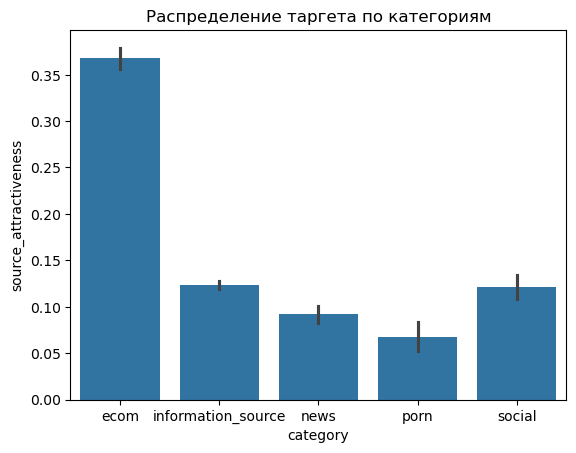

In [180]:
sns.barplot(x='category', y='source_attractiveness', data = data)
plt.title('Распределение таргета по категориям')
plt.show()

# Анализ корреляции категориального признака с таргетом 
- `ecom` сайты имеют самую большую корреляцию с таргетом, они наоболее значимы для таргета
-  `porn` категория имеет самую низкую карреляцию, что может свидительствовать о не сильном влияние на целевую переменнуюЭ

In [183]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform='pandas')
ohetransform = ohe.fit_transform(data_clean[["category"]])
ohetransform

,category_ecom,category_information_source,category_news,category_porn,category_social
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
7994,0.0,1.0,0.0,0.0,0.0
7995,0.0,1.0,0.0,0.0,0.0
7996,0.0,1.0,0.0,0.0,0.0
7997,0.0,1.0,0.0,0.0,0.0


In [185]:
data_ohe_clean = pd.concat([data_clean, ohetransform], axis=1).drop(columns="category")
data_ohe_clean

,Unnamed: 0,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,date_of_registration,category_ecom,category_information_source,category_news,category_porn,category_social
1,2047,874840.0,21100.0,0,12872,0,0.0,10.721619,-0.022317,0.238375,0.0,1.0,0.0,0.0,0.0
2,1118,571210.0,94707.0,0,0,7420,0.0,1.922243,0.046396,0.255639,0.0,1.0,0.0,0.0,0.0
3,4992,89534.0,924.0,0,834,0,0.0,2.149243,-0.093360,0.093438,0.0,0.0,1.0,0.0,0.0
4,9970,1043953.0,289288.0,0,58375,20260,3948.0,3.764965,0.027303,0.387772,0.0,1.0,0.0,0.0,0.0
6,4553,99712.0,0.0,0,0,15178,3725.0,20.786928,0.063572,1.473325,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,5931,4221099.0,1204744.0,0,336212,24270,8234.0,0.451923,0.115761,0.887457,0.0,1.0,0.0,0.0,0.0
7995,361,1468601.0,474524.0,0,61307,83928,16841.0,4.191481,0.017470,1.321027,0.0,1.0,0.0,0.0,0.0
7996,2621,93172.0,6418.0,0,3418,705,0.0,3.745192,-0.019069,0.231877,0.0,1.0,0.0,0.0,0.0
7997,2605,82916.0,0.0,0,4302,1718,1007.0,5.837475,-0.061523,0.328112,0.0,1.0,0.0,0.0,0.0


In [187]:
Y = data_ohe_clean["source_attractiveness"]
X = data_ohe_clean.drop(columns="source_attractiveness")

X_train, x_test, Y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=10)

model = Ridge()
model.fit(X_train,Y_train)
y_pred = model.predict(x_test)
y_pred_train = model.predict(X_train)

print(f"TEST MSE:{mean_squared_error(y_pred, y_test)}")
print(f"TRAIN MSE:{mean_squared_error(y_pred_train, Y_train)}")
print(model.coef_)

TEST MSE:0.014889597940280639
TRAIN MSE:0.015868599621389652
[-5.03372552e-07 -1.87325128e-08  2.69774627e-08  4.83347934e-08
  1.42401602e-07  3.78973196e-07 -4.19502061e-06  1.88694793e-03
  5.34463402e-02  1.98339625e-01 -1.06006739e-02 -4.02878630e-02
 -8.88001558e-02 -5.86509327e-02]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=5.69339e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


# Видим значительное улучшение результата. Теперь перейдем к стандартизации данных

In [208]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), ["category"]),
    ('scaling', StandardScaler(), numeric_features)
])

ridge_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

Y = data_clean["source_attractiveness"]
X = data_clean.drop(columns="source_attractiveness")
X_train, x_test, Y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=10)

model = ridge_pipeline.fit(X_train, Y_train)
y_pred = model.predict(x_test)
y_pred_train = model.predict(X_train)

print(f"TEST MSE:{mean_squared_error(y_pred, y_test)}")
print(f"TRAIN MSE:{mean_squared_error(y_pred_train, Y_train)}")
#print(model.coef_)


TEST MSE:0.014886418928261539
TRAIN MSE:0.015868704041231044


После стандартизации прирост не сильно большой.